In [2]:
#Importing libraries for the task and data handling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data0 = pd.read_csv("Cleaned_hep_Row.csv") #load the corrected data

In [9]:
data0.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,...,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Unnamed: 20
0,2.0,27.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,2.0,1.2,133.0,98.0,4.1,39.0,1.0,NaN
1,2.0,34.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,...,1.0,2.0,2.0,1.0,72.0,46.0,4.4,57.0,1.0,NaN
2,2.0,36.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,0.8,85.0,44.0,4.2,85.0,1.0,NaN
3,2.0,30.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,0.7,52.0,38.0,3.9,52.0,1.0,NaN
4,2.0,44.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,0.6,110.0,145.0,4.4,70.0,1.0,NaN


In [10]:
#As shown above while creating the csv file, the last column being "\n" we need to remove the last unnamed column
#id is not required in the analysis and can be dropped

list = ['Unnamed: 20']
data0.drop(list, axis=1, inplace=True)


In [11]:
y = data0.Class
list = ["Class"]
features = data0.drop(list, axis=1, inplace=False)

In [12]:
print(data0.isnull().sum())

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER_BIG          0
LIVER_FIRM         0
SPLEEN_PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK_PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64


# Exploratory Data Analysis (EDA)

In [13]:
#Frequency of cancer stages
D, L = data0['Class'].value_counts()

In [15]:
print('Number of Dying cells: ', D)
print('Number of Live cells: ', L)

Number of Dying cells:  67
Number of Live cells:  13


Text(0.8, 50, 'Die=67')

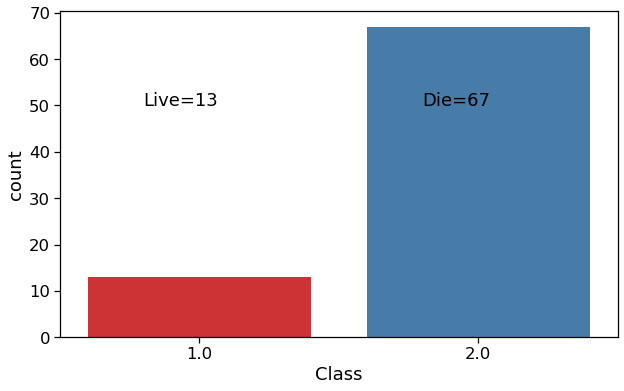

In [19]:
import seaborn as sns #for interative graph
plt.figure(figsize=(10,6))
sns.set_context("notebook", font_scale=1.5)
sns.countplot("Class", data=data0, palette="Set1")
plt.annotate("Live=13", xy=(-0.2, 50), xytext=(-0.2,50), size=18, color="black")
plt.annotate("Die=67", xy=(0.8, 50), xytext=(0.8,50), size=18, color="black")

In [20]:
features.describe()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000
mean,40.66250,1.137500,1.525000,1.737500,1.350000,1.612500,1.850000,1.837500,1.525000,1.812500,1.687500,1.850000,1.875000,1.221250,102.912500,82.025000,3.843750,62.512500,1.41250
std,11.28003,0.346547,0.502525,0.442769,0.479979,0.490253,0.359324,0.371236,0.502525,0.392775,0.466437,0.359324,0.332805,0.875213,53.684779,71.599974,0.576292,23.427774,0.49539
min,20.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.00000
25%,32.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,68.250000,30.750000,3.500000,46.000000,1.00000
50%,38.50000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,85.000000,56.500000,4.000000,62.000000,1.00000
75%,49.25000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.300000,133.500000,102.750000,4.200000,77.250000,2.00000
max,72.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.800000,280.000000,420.000000,5.000000,100.000000,2.00000


In [21]:
data0.keys()

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')

In [22]:
#Standardization of features
stdX = (features-features.mean()) / (features.std())
data_st = pd.concat([y,stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st, id_vars="Class", var_name = "features", value_name="value")

In [23]:
data_st

,Class,features,value
0,2.0,AGE,-1.211211
1,2.0,AGE,-0.590646
2,2.0,AGE,-0.413341
3,2.0,AGE,-0.945255
4,2.0,AGE,0.295877
...,...,...,...
1515,2.0,HISTOLOGY,1.185934
1516,2.0,HISTOLOGY,-0.832677
1517,2.0,HISTOLOGY,-0.832677
1518,1.0,HISTOLOGY,1.185934


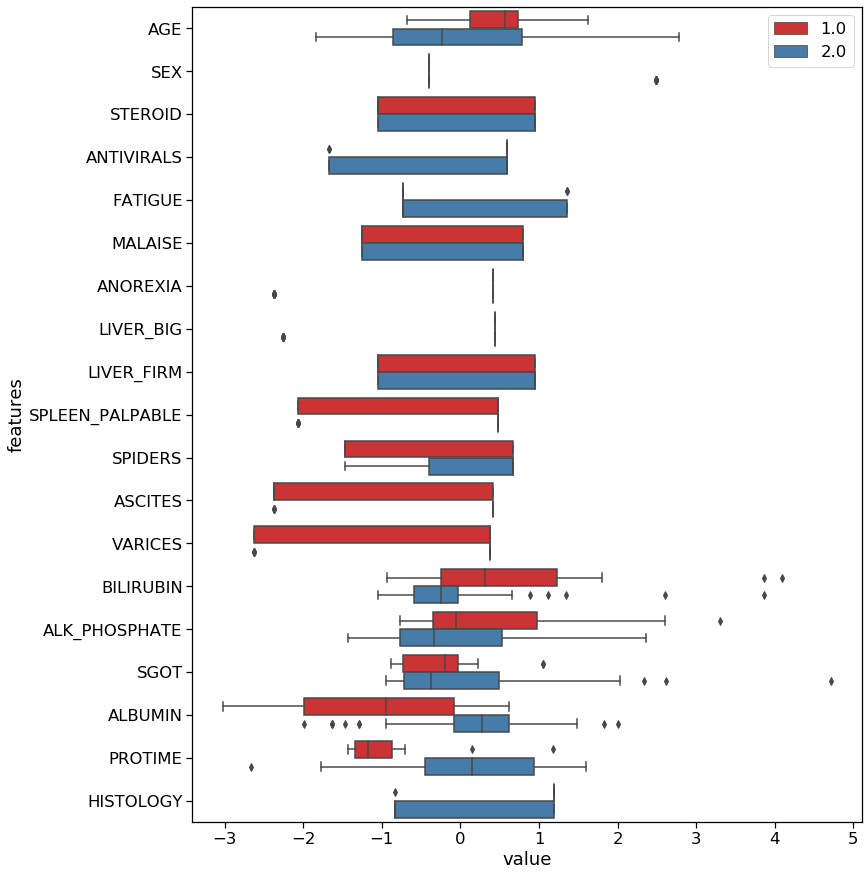

In [24]:
plt.figure(figsize=(12,15))
sns.set_context("notebook", font_scale=1.5)
sns.boxplot(x="value", y="features", hue="Class", data=data_st, palette="Set1")
plt.legend(loc="best")

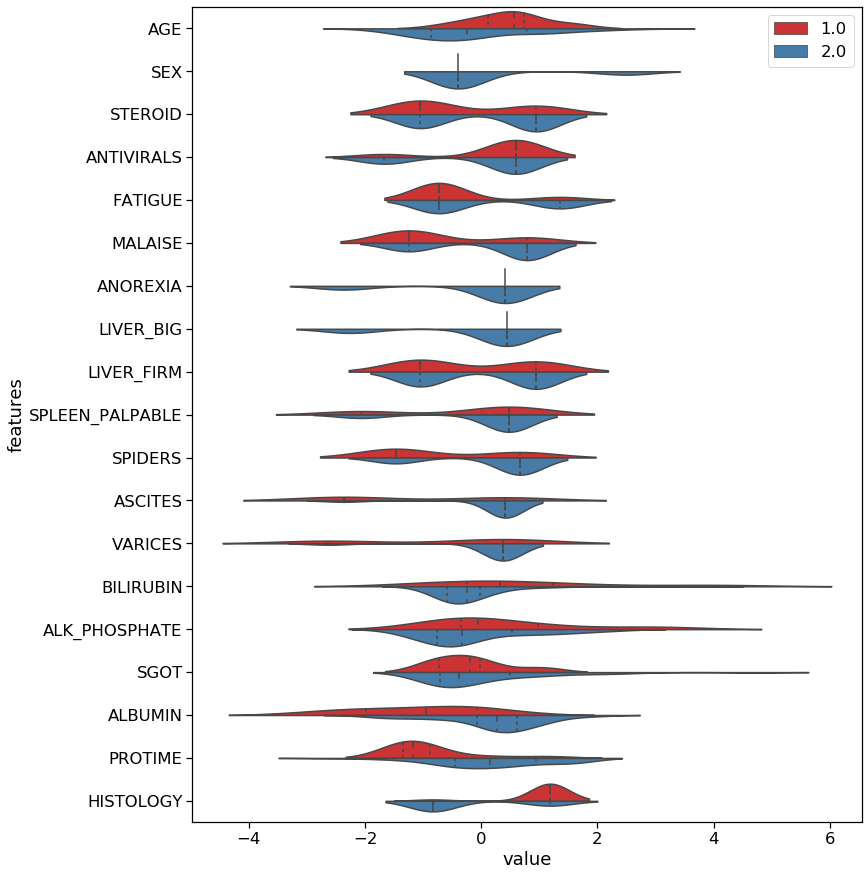

In [25]:
plt.figure(figsize=(12,15))
sns.set_context("notebook", font_scale=1.5)
sns.violinplot(x="value", y="features", hue="Class", data=data_st, split=True, inner="quart", palette="Set1")
plt.legend(loc="best")

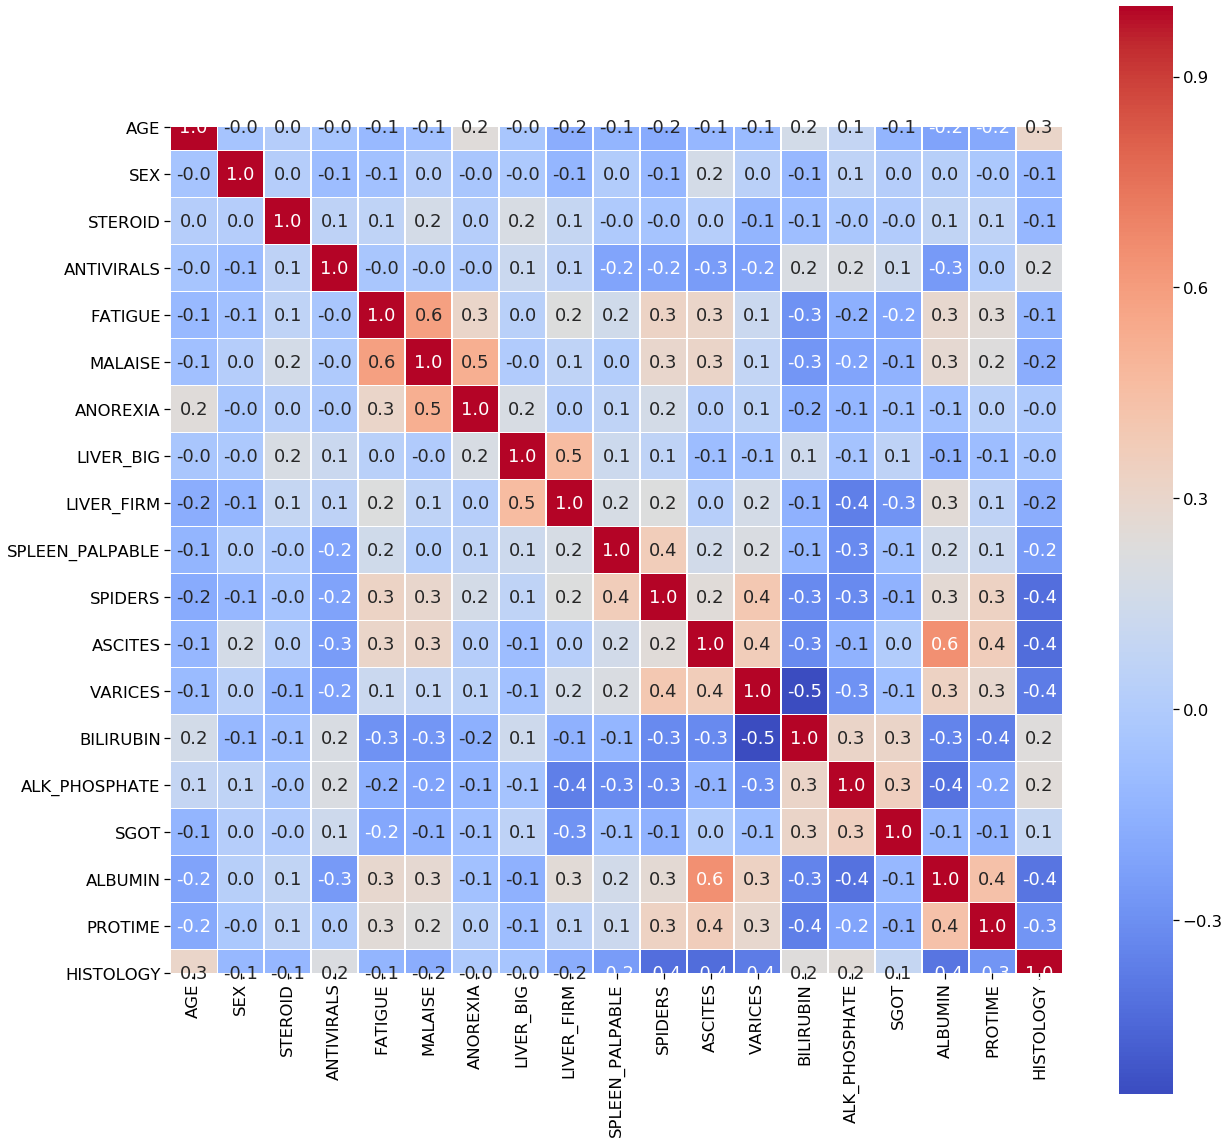

In [26]:
corr = features.corr() #corr finds the correlations
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt=".1f", xticklabels=True, yticklabels=True, cmap="coolwarm", linewidths=0.3, ax=ax)

In [27]:
def pearson(x,y):
    #Compute the correlation matrix for the function
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]


In [28]:
#Compute correlation between age and SEX
r_eg = pearson(data0['AGE'], data0['SEX'])
print(r_eg)

-0.046265423217596774


In [29]:
#Compute correlation between ALBUMIN and ASCITES
r_eg = pearson(data0['ALBUMIN'], data0['ASCITES'])
print(r_eg)

0.64949049498705


In [35]:
name = []
for i, j in zip(range(1,20), range(1,20)):
    r = pearson(data0.iloc[:,1], data0.iloc[:,j])
    if abs(r) >=0.8 and data0.columns[j] not in name:
        name.append(data0.columns[j])
        
print("Attributes with correlation higher than 0.8: ",name)

Attributes with correlation higher than 0.8:  ['AGE']


In [ ]:
#Indicating this dataset had uncorrelated datas

In [34]:
name = []
for i, j in zip(range(1,20), range(1,20)):
    r = pearson(data0.iloc[:,1], data0.iloc[:,j])
    if abs(r) <=0.3 and data0.columns[j] not in name:
        name.append(data0.columns[j])
        
print("Attributes with correlation less than 0.3: ",name)

Attributes with correlation less than 0.3:  ['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']


Uncorrelated data gives more information!


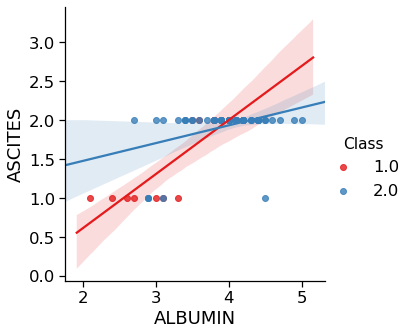

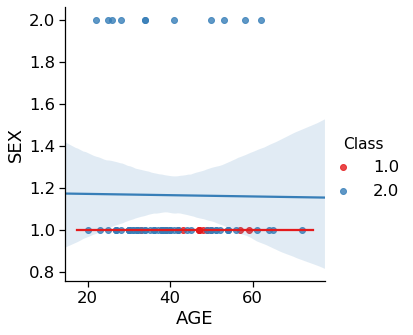

In [36]:
#Depicting the use of correlation using linear regression

#Using highly correlated data
sns.lmplot(x='ALBUMIN', y='ASCITES', data=data0, hue="Class", palette="Set1")

#Using less correlated data
sns.lmplot(x='AGE', y='SEX', data=data0, hue="Class", palette="Set1")

print("Uncorrelated data gives more information!")

# Statistical Exploration of data

In [37]:
#Determining cummulative distribution function
def cdf(data0):
    n=len(data0)
    x=np.sort(data0)
    y=np.arange(1, n+1)/n
    return x, y


In [45]:
data2 = data0["ALBUMIN"]
die2 = data2[data0['Class']==1]
live2 = data2[data0['Class']==2]

data3 = data0["BILIRUBIN"]
die3 = data3[data0['Class']==1]
live3 = data3[data0['Class']==2]

In [46]:
x1, y1 = cdf(die2)
x2, y2 = cdf(live2)

x3, y3 = cdf(die3)
x4, y4 = cdf(live3)

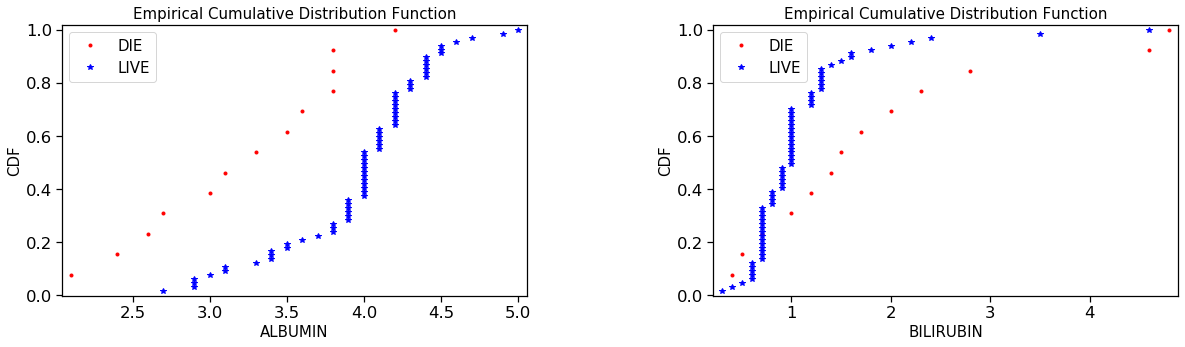

In [48]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.subplots_adjust(wspace=0.5, hspace=2)
plt.plot(x1, y1, marker='.', linestyle='none',color='red',label="DIE")
plt.plot(x2, y2, marker='*', linestyle='none',color='blue',label="LIVE")
plt.margins(0.02)
plt.xlabel("ALBUMIN", size=15)
plt.ylabel("CDF", size=15)
plt.title("Empirical Cumulative Distribution Function", size=15)
plt.legend(prop={'size':15})

plt.subplot(2,2,2)
plt.subplots_adjust(wspace=0.4, hspace=2)
plt.plot(x3, y3, marker='.', linestyle='none',color='red',label="DIE")
plt.plot(x4, y4, marker='*', linestyle='none',color='blue',label="LIVE")
plt.margins(0.02)
plt.xlabel("BILIRUBIN", size=15)
plt.ylabel("CDF", size=15)
plt.title("Empirical Cumulative Distribution Function", size=15)
plt.legend(prop={'size':15})

# Hypothesis Testing

In [49]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [50]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [51]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

In [52]:
diff_of_means(die2, live2)

-0.7411021814006884

In [54]:
# Computing difference of mean overall acore
empirical_diff_means = diff_of_means(die2, live2)

# Drawing 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(die2, live2,diff_of_means, size=10000)

# Computing p-value: p
p = np.sum(perm_replicates >= empirical_diff_means)/ len(perm_replicates) 

print('p-value =', p)

p-value = 1.0
